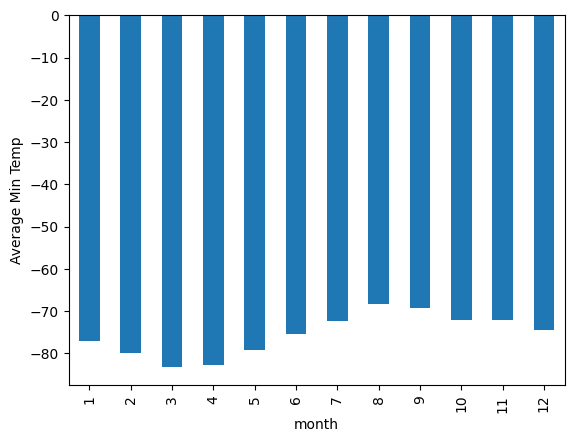

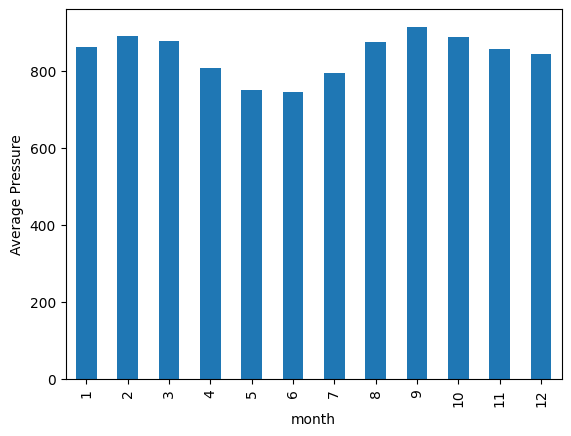

In [1]:
# Import necessary libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Fetch the page content
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table and convert it to a DataFrame
table = soup.find_all('table')[0]
df = pd.read_html(str(table))[0]

# Renaming columns
df.columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Check and convert data types if necessary
df = df.astype({'id': int, 'sol': int, 'ls': float, 'min_temp': float, 'pressure': float})

# Analyzing data
num_of_mars_months = df['month'].nunique()
num_of_martian_days = df['sol'].max()

# Finding the coldest and warmest months
df['min_temp'] = df['min_temp'].astype(float)
temp_month = df.groupby('month')['min_temp'].mean()

temp_month.plot(kind='bar')
plt.ylabel('Average Min Temp')
plt.show()

# Finding the lowest and highest pressure months
df['pressure'] = df['pressure'].astype(float)
pressure_month = df.groupby('month')['pressure'].mean()

pressure_month.plot(kind='bar')
plt.ylabel('Average Pressure')
plt.show()

# Exporting data to CSV
df.to_csv('mars_weather.csv', index=False)
